In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def check(G):
    for i in range(len(G)):
        for j in range(len(G)):
            if G[i][j] != G[j][i]:
                print('Error!')

In [8]:
def from_adjacency_to_diag(A):
    diagonal = []
    for i in range(len(A)):
        sum = 0
        for j in range(len(A)):
            sum += A[i][j]
        diagonal.append(sum)
        
    return np.diag(diagonal)

In [9]:
def sorter(L):
    eig_val, eig_vec = np.linalg.eig(L)
    sort_idx = np.argsort(eig_val)
    eig_val = eig_val[sort_idx]
    eig_vec = eig_vec[:, sort_idx]
    
    return eig_val, eig_vec

In [10]:
def plot_eigen_values(eig_val, color, filename):
    fig, ax = plt.subplots(figsize=(14, 6))
    
    for i in range(len(eig_val)):
        ax.scatter(i, eig_val[i], color=color)
    
    ax.set_xlabel(r'$i$', fontsize=16)
    ax.set_ylabel(r'$eig\_val_i$', fontsize=16)
    plt.title('Собственные числа', fontsize=16)
    ax.grid()
    plt.savefig(filename)

In [11]:
def plot_eigen_vectors(eig_vec, color, filename):
    fig, axs = plt.subplots(2, 1, figsize=(14, 6))
    eig_vec = eig_vec.T
    
    for i in range(len(eig_vec)):
        axs[0].scatter(i, eig_vec[1][i], color='purple')
        axs[1].scatter(i, eig_vec[2][i], color='green')

    axs[0].set_xlabel(r'$i$', fontsize=16)
    axs[0].set_ylabel(r'$eig\_vec_i$', fontsize=16)
    axs[1].set_xlabel(r'$i$', fontsize=16)
    axs[1].set_ylabel(r'$eig\_vec_i$', fontsize=16)
    axs[0].grid()
    axs[1].grid()
    plt.savefig(filename)

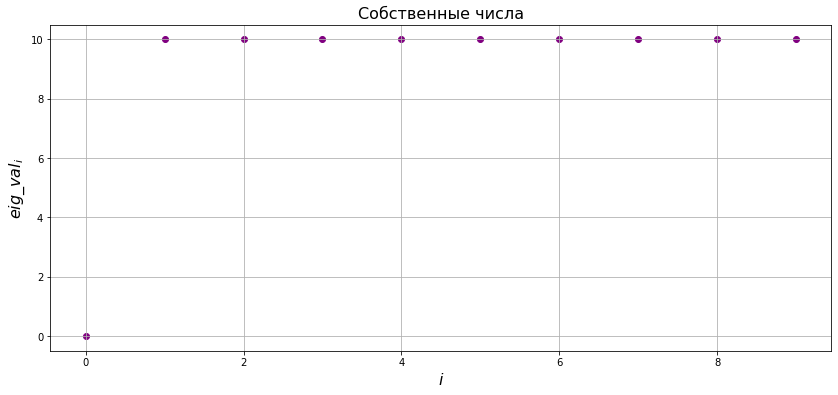

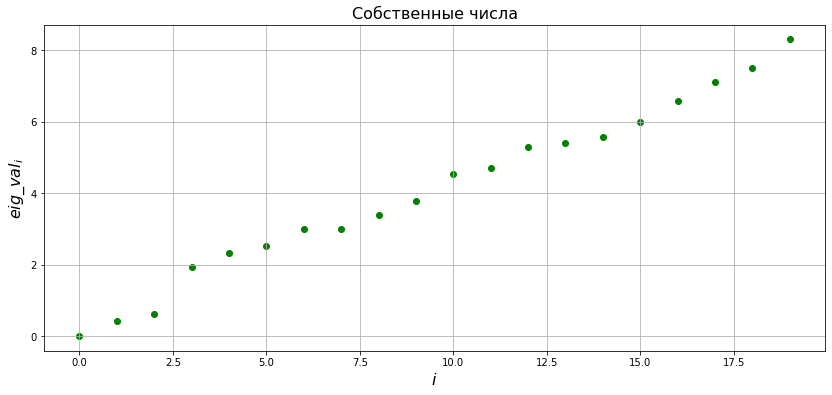

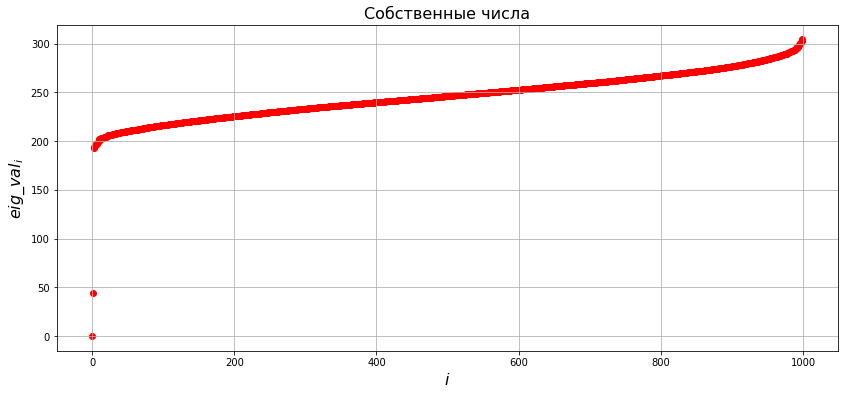

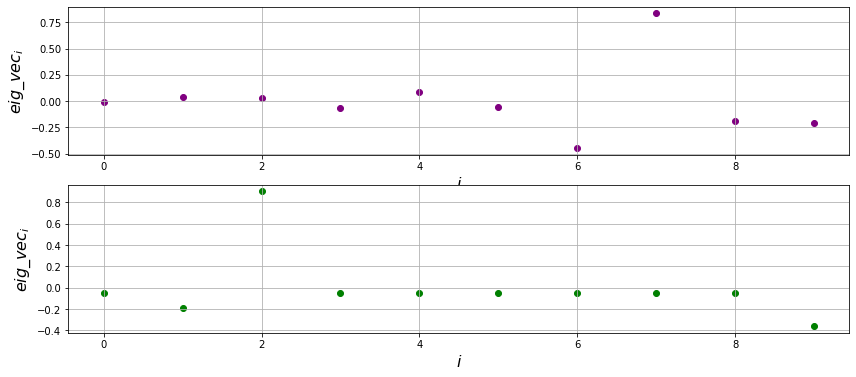

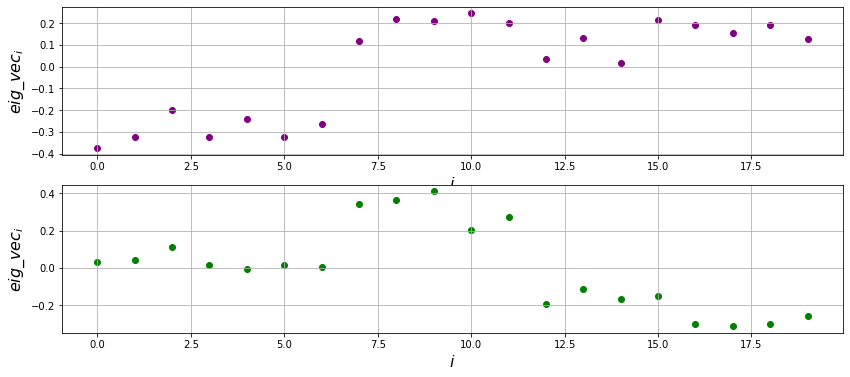

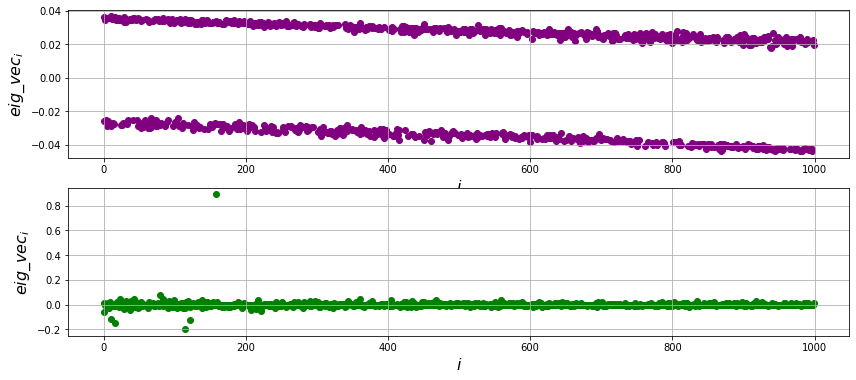

In [12]:
if __name__ == '__main__':
    G1 = pd.read_table('G1.txt', sep='\s+', engine='python', names=[i for i in range(10)])
    G2 = pd.read_table('G2.txt', sep='\s+', engine='python', names=[i for i in range(20)])
    G3 = pd.read_table('adjacency_matrix.txt', sep='\s+', engine='python', names=[i for i in range(1000)])

    A1 = np.array(G1)
    A2 = np.array(G2)
    A3 = np.array(G3)
    
    D1 = from_adjacency_to_diag(A1)
    D2 = from_adjacency_to_diag(A2)
    D3 = from_adjacency_to_diag(A3)
    
    L1 = np.array(D1 - A1, dtype=np.float64)
    L2 = np.array(D2 - A2, dtype=np.float64)
    L3 = np.array(D3 - A3, dtype=np.float64)
    
    eig_val1, eig_vec1 = sorter(L1)
    eig_val2, eig_vec2 = sorter(L2)
    eig_val3, eig_vec3 = sorter(L3)
    
    plot_eigen_values(eig_val1, 'purple', "eigen_values1.pdf")
    plot_eigen_values(eig_val2, 'green', "eigen_values2.pdf")
    plot_eigen_values(eig_val3, 'red', "eigen_values3.pdf")
    
    plot_eigen_vectors(eig_vec1, 'purple', "eigen_vectors1.pdf")
    plot_eigen_vectors(eig_vec2, 'green', "eigen_vectors2.pdf")
    plot_eigen_vectors(eig_vec3, 'red', "eigen_vectors3.pdf")